In [14]:
# 📦 Importing Libraries
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# ⚙️ Defining Performance Metrics
# ===============================================
def print_metrics(y_true, y_pred, title="Model Performance"):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{title}")
    print("-"*40)
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return mse, r2


In [16]:
# 📂 Loading Dataset
# ===============================================
df = pd.read_csv("mobile_price.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())


Dataset Shape: (807, 8)

First 5 Rows:
    Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3  4.0  128.0         6.00           48       13.0           4000   
1      3.4  6.0   64.0         4.50           48       12.0           4000   
2      4.3  4.0    4.0         4.50           64       16.0           4000   
3      4.4  6.0   64.0         6.40           48       15.0           3800   
4      4.5  6.0  128.0         6.18           35       15.0           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999  


In [17]:
# 🧹 Handling Missing Values and displaying basic statistics
# ===============================================
print("\nMissing Values:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nDataset Info:\n")
print(df.info())
print("\nBasic Statistics:\n", df.describe())


Missing Values:
 Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB
None

Basic Statistics:
           Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  807.000000  807.000000  807.000000   807.000000   807.000000   
mean     4.112639    5.941760   64.3903

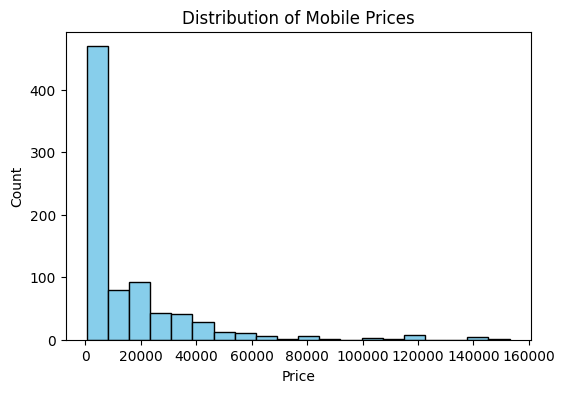

In [18]:
# 📊 Plotting histogram of target feature
# ===============================================
target = 'Price'  # change if your target column name differs
plt.figure(figsize=(6,4))
plt.hist(df[target], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Mobile Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

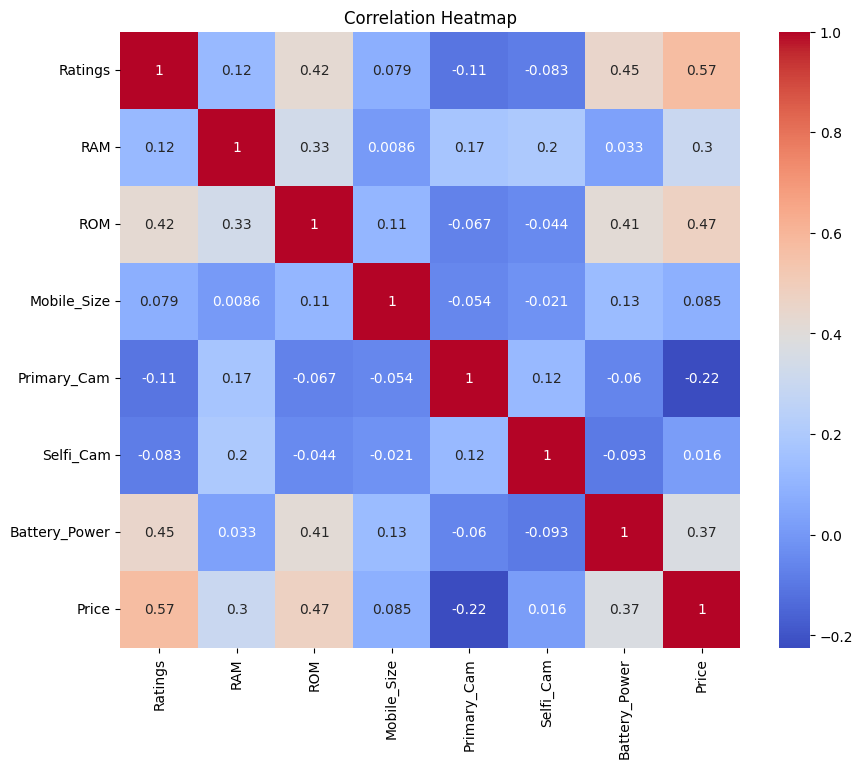

In [20]:
# ### Plotting correlation map
# ===============================================
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

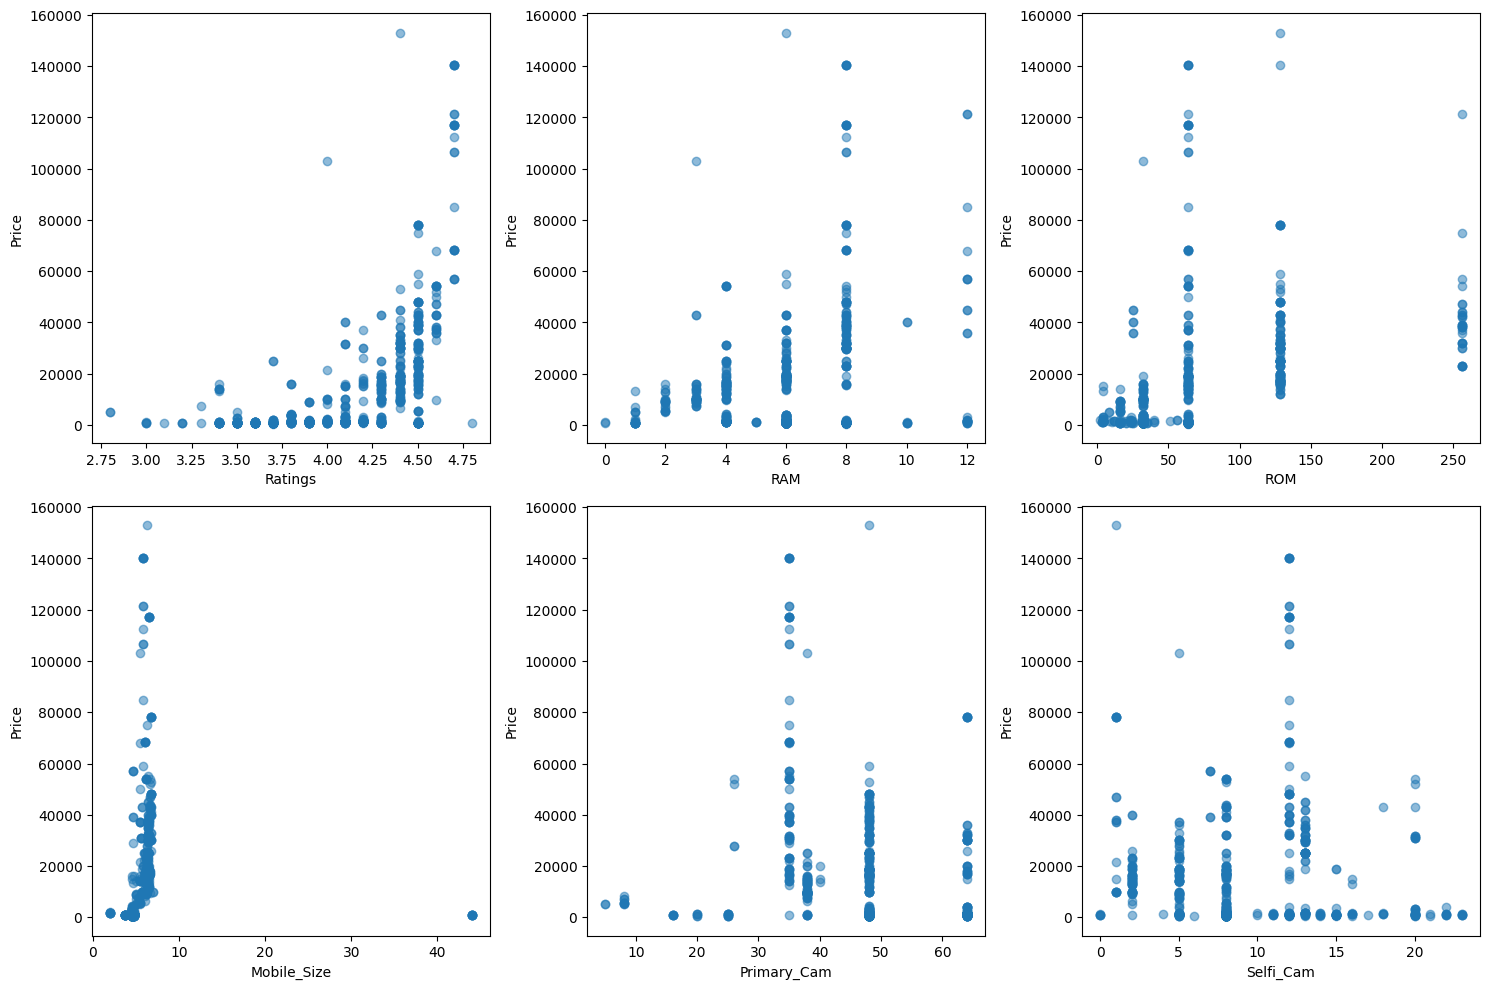

In [21]:
# 📈 Plotting all features with target
# ===============================================
features = df.drop(columns=[target]).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(features[:6]):  # show first 6 for simplicity
    plt.subplot(2,3,i+1)
    plt.scatter(df[col], df[target], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

In [22]:
# 🔄 Splitting final X and y
# ===============================================
X = df.drop(columns=[target]).values
y = df[target].values.reshape(-1,1)


In [23]:
# ✂️ Doing train/test split
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")



Training Samples: 645, Testing Samples: 162


In [30]:
# Add bias term
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b  = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]



In [33]:
# Gradient Descent Function (Stable)
def gradient_descent(X, y, lr=0.001, epochs=10000, l2_lambda=0):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for i in range(epochs):
        y_pred = X @ theta
        gradients = (2/m) * (X.T @ (y_pred - y) + l2_lambda * theta)
        theta -= lr * gradients
        if i % 2000 == 0:
            cost = np.mean((y_pred - y)**2)
            print(f"Epoch {i}: Cost = {cost:.6f}")
    return theta

In [32]:
# Train model
theta_gd = gradient_descent(X_train_b, y_train, lr=0.01, epochs=10000)

Epoch 0: Cost = 764434363.939535
Epoch 2000: Cost = 298488983.783550
Epoch 4000: Cost = 298488983.783550
Epoch 6000: Cost = 298488983.783550
Epoch 8000: Cost = 298488983.783550


In [34]:

# Predict
y_pred_gd = X_test_b @ theta_gd


In [35]:
# Evaluate
print_metrics(y_test, y_pred_gd, "Gradient Descent (with Standardization, No Regularization)")



Gradient Descent (with Standardization, No Regularization)
----------------------------------------
MSE: 239357657.4315
R² Score: 0.4332


(239357657.4314843, 0.43322813972091834)

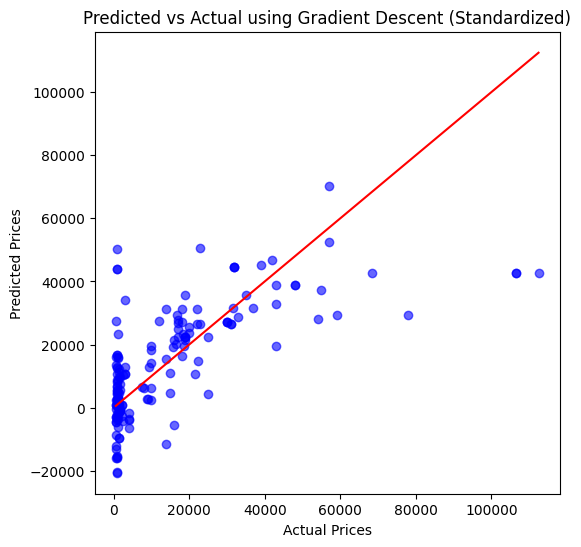

In [36]:
# Plot Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gd, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual using Gradient Descent (Standardized)")
plt.show()

In [37]:
# 🔹 L2 Regularization (Ridge Regression) - Gradient Descent
# ===============================================

lambda_values = [0, 0.1, 1, 10, 100]
r2_scores = []

for lam in lambda_values:
    print(f"\nTraining model with λ = {lam}")
    theta_l2 = gradient_descent(X_train_b, y_train, lr=0.01, epochs=10000, l2_lambda=lam)
    y_pred_l2 = X_test_b @ theta_l2
    mse, r2 = print_metrics(y_test, y_pred_l2, f"Ridge Regression (λ={lam})")
    r2_scores.append(r2)


Training model with λ = 0
Epoch 0: Cost = 764434363.939535
Epoch 2000: Cost = 298488983.783550
Epoch 4000: Cost = 298488983.783550
Epoch 6000: Cost = 298488983.783550
Epoch 8000: Cost = 298488983.783550

Ridge Regression (λ=0)
----------------------------------------
MSE: 239357657.4315
R² Score: 0.4332

Training model with λ = 0.1
Epoch 0: Cost = 764434363.939535
Epoch 2000: Cost = 298488992.556169
Epoch 4000: Cost = 298488992.556145
Epoch 6000: Cost = 298488992.556145
Epoch 8000: Cost = 298488992.556145

Ridge Regression (λ=0.1)
----------------------------------------
MSE: 239343354.7082
R² Score: 0.4333

Training model with λ = 1
Epoch 0: Cost = 764434363.939535
Epoch 2000: Cost = 298489858.296564
Epoch 4000: Cost = 298489858.296345
Epoch 6000: Cost = 298489858.296345
Epoch 8000: Cost = 298489858.296345

Ridge Regression (λ=1)
----------------------------------------
MSE: 239215733.1646
R² Score: 0.4336

Training model with λ = 10
Epoch 0: Cost = 764434363.939535
Epoch 2000: Cost 

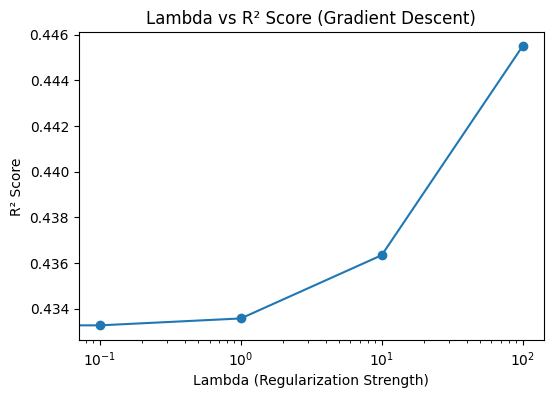

In [38]:
# 🔸 Plot: λ vs R² Score
# ===============================================
plt.figure(figsize=(6,4))
plt.plot(lambda_values, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("R² Score")
plt.title("Lambda vs R² Score (Gradient Descent)")
plt.show()